In [ ]:
from AlgorithmImports import *

class DonchianChannelBreakoutAlgorithm(QCAlgorithm):

    def Initialize(self):
        self.SetStartDate(2020, 1, 1)
        self.SetEndDate(2022, 8, 1)
        self.SetCash(100000)
        self.symbol = self.AddEquity("XOM", Resolution.Daily).Symbol
        self.EnableAutomaticIndicatorWarmUp = True
        self.indicator = self.DCH(self.symbol, 20, 20)
        self.SetBenchmark(self.symbol)
        self.DCH_previous_Up = None
        self.DCH_previous_Down = None
        self.can_short = False

    def OnData(self, data: Slice):
        if self.symbol not in data.Bars:
            return
        bar = data.Bars[self.symbol]

        if  self.DCH_previous_Up is not None and self.DCH_previous_Down is not None:
            if bar.Close > self.DCH_previous_Up and not self.Portfolio[self.symbol].IsLong:
                self.SetHoldings(self.symbol, 1)
            
            if bar.Close <= self.DCH_previous_Down:
                if self.can_short and not self.Portfolio[self.symbol].IsShort:
                    self.SetHoldings(self.symbol, -1)
                if not self.can_short and self.Portfolio[self.symbol].IsLong:
                    self.SetHoldings(self.symbol, 0)
        
        self.DCH_previous_Up = self.indicator.UpperBand.Current.Value
        self.DCH_previous_Down = self.indicator.LowerBand.Current.Value

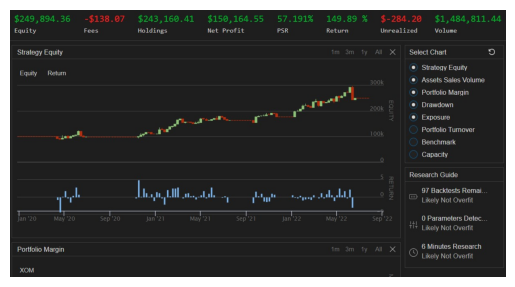

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "C:/Users/meets/QUANT/CODE/QUANTCONNECT/DONCHIAN_20.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()